In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Загрузим уже обработанные в прошлом ДЗ данные!

In [2]:
df = pd.read_csv('processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
Y = df["Surge_Pricing_Type"]

### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты?** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [3]:
### Центрируем данные

### Your code is here

X_centered = X - X.mean()

In [4]:
from sklearn.decomposition import PCA

### Your code is here
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_centered)
pca_df = pd.DataFrame(X_pca, columns=['PCA_1', 'PCA_2'])

pca.explained_variance_ratio_

array([0.63176117, 0.21129863])

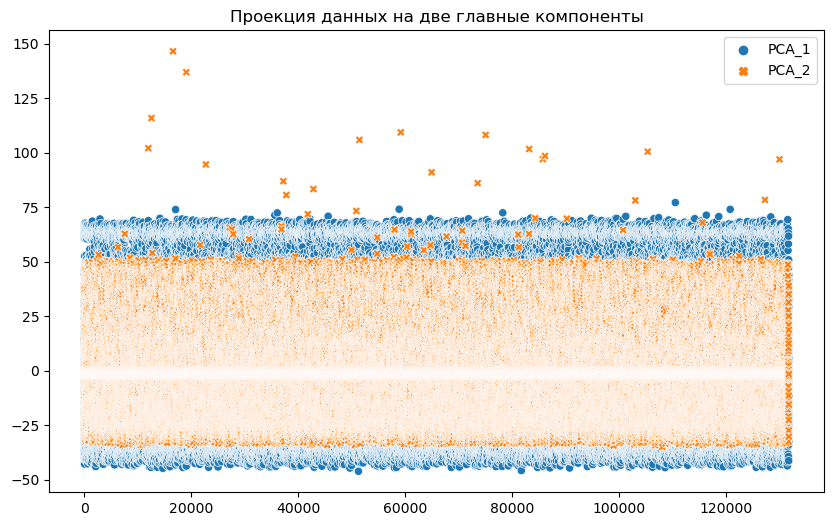

In [5]:
plt.figure(figsize=(10, 6))

plt.title("Проекция данных на две главные компоненты")
sns.scatterplot((pca_df['PCA_1'], pca_df['PCA_2'])) ;

**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению **


<Axes: >

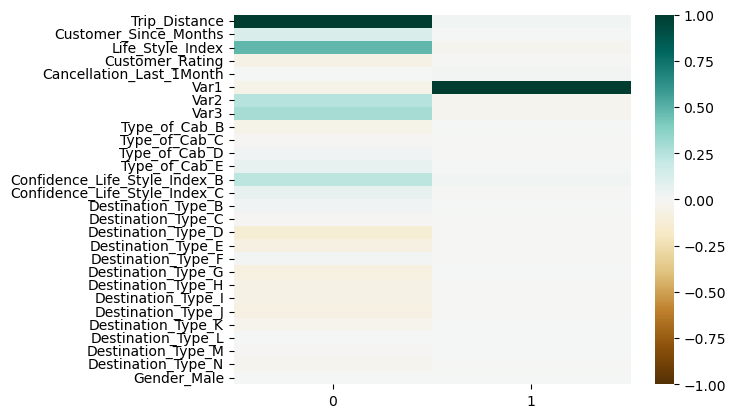

In [6]:
### Your code is here
pca1_corr = X.corrwith(pca_df['PCA_1'])
pca2_corr = X.corrwith(pca_df['PCA_2'])

corrs = pd.concat((pca1_corr, pca2_corr), axis=1)

sns.heatmap(corrs,
           xticklabels=corrs.columns,
           yticklabels=corrs.index,
           cmap='BrBG',
           vmin=-1,
           vmax=1)

**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой?**

<Axes: title={'center': 'Проекция данных на две главные компоненты'}, xlabel='PCA_1', ylabel='PCA_2'>

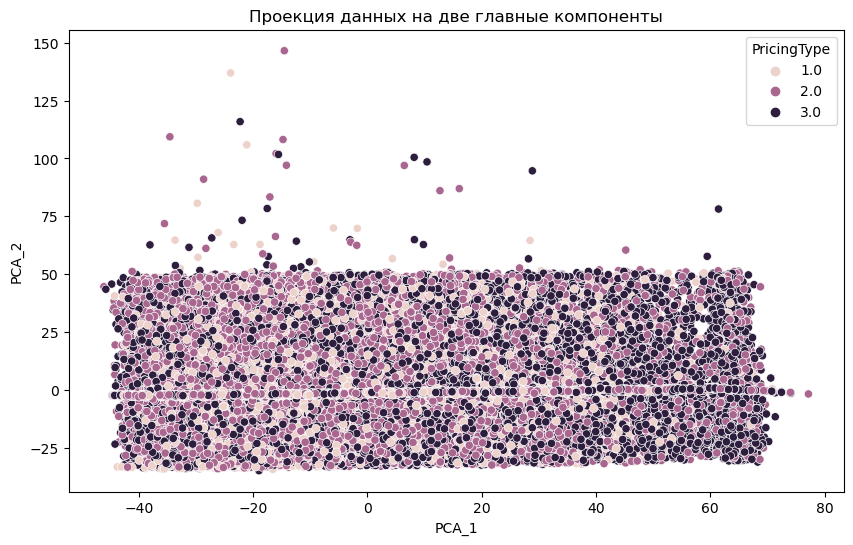

In [7]:
### Your code is here
PCA_df = np.concatenate((pca_df.values, Y.values.reshape(-1, 1)), axis=1)
PCA_df = pd.DataFrame(PCA_df, columns=['PCA_1', 'PCA_2', 'PricingType'])

plt.figure(figsize=(10, 6))

plt.title("Проекция данных на две главные компоненты")
sns.scatterplot(data=PCA_df, x='PCA_1', y='PCA_2', hue='PricingType')

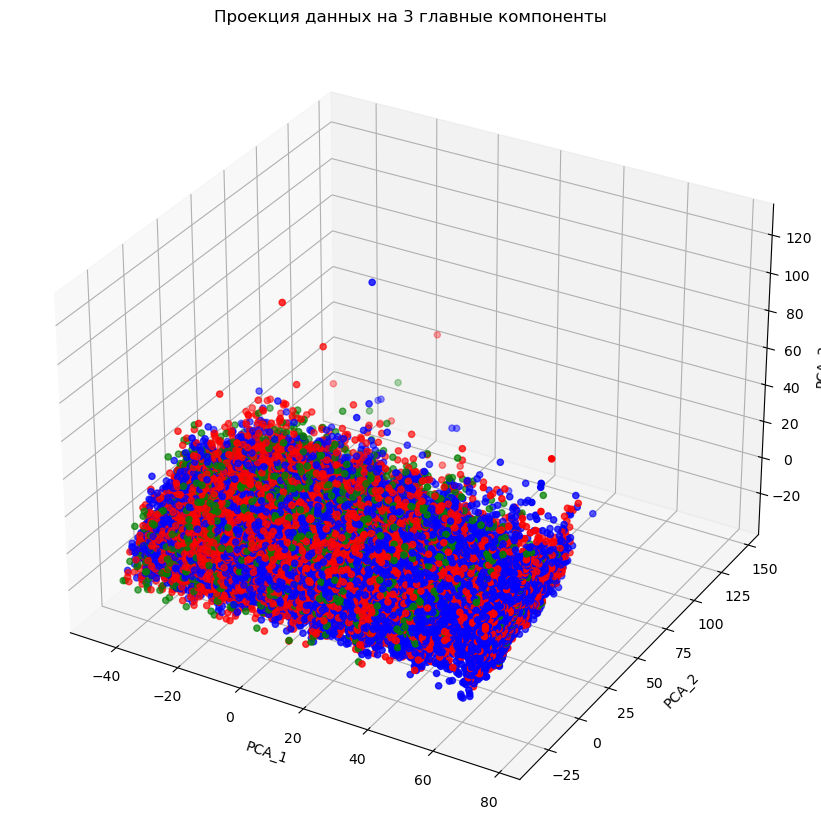

In [8]:
from mpl_toolkits.mplot3d import Axes3D

pca3 = PCA(n_components=3)
X3_pca = pca3.fit_transform(X_centered)
X3_pca = pd.DataFrame(X3_pca, columns=['PCA_1', 'PCA_2', 'PCA_3'])

PCA3_df = np.concatenate((X3_pca.values, Y.values.reshape(-1, 1)), axis=1)
PCA3_df = pd.DataFrame(PCA3_df, columns=['PCA_1', 'PCA_2', 'PCA_3','PricingType'])

fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

plt.title('Проекция данных на 3 главные компоненты')
ax.set_xlabel("PCA_1")
ax.set_ylabel("PCA_2")
ax.set_zlabel("PCA_3")

colors = PCA3_df['PricingType'].replace([1, 2, 3], ['green', 'red', 'blue'])

ax.scatter(PCA3_df['PCA_1'], PCA3_df['PCA_2'], PCA3_df['PCA_3'], c=colors)

Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

<Axes: >

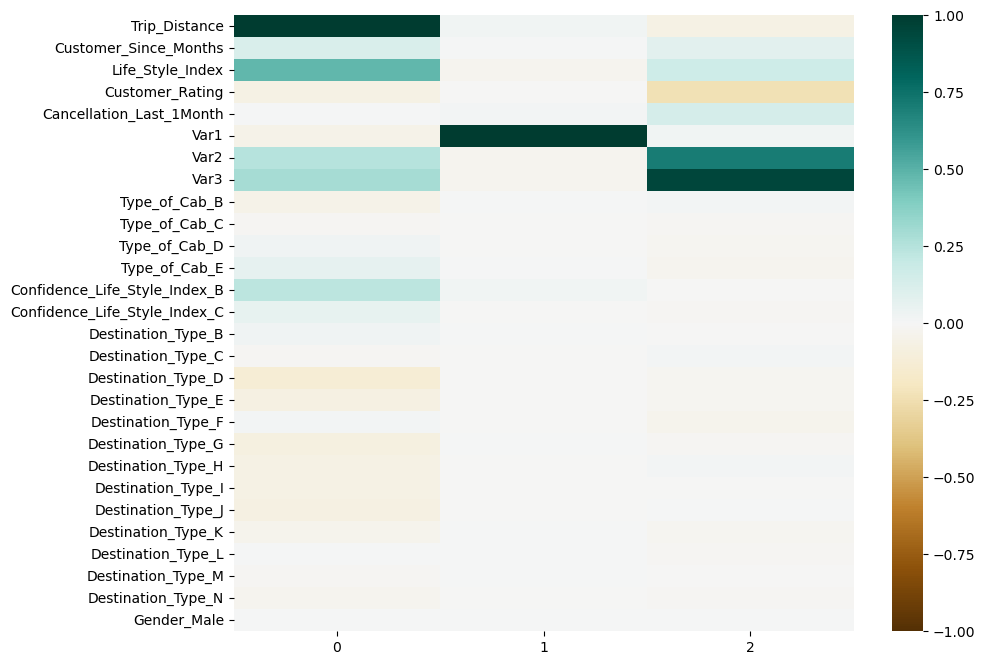

In [9]:
### Your code is here
pca1_corr = X.corrwith(X3_pca['PCA_1'])
pca2_corr = X.corrwith(X3_pca['PCA_2'])
pca3_corr = X.corrwith(X3_pca['PCA_3'])

corrs = pd.concat((pca1_corr, pca2_corr, pca3_corr), axis=1)

plt.figure(figsize=(10, 8))
sns.heatmap(corrs,
           xticklabels=corrs.columns,
           yticklabels=corrs.index,
           cmap='BrBG',
           vmin=-1,
           vmax=1)

**Задание 4.** Обучите логистическую регрессию на первых двух компонентах центрированных данных и подберите гиперпараметры. Обучите логистическую регрессию на центрированных данных и подберите гиперпараметры. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [10]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X_centered, Y, test_size=0.2,
                                                   shuffle=True, random_state=2022)

In [12]:
### Your code is here

param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
              'model__C': [1e-5, 0.0001, 0.001, 0.01]}

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('pca', PCA(n_components=2)),
                 ('model', LogisticRegression())])

clf = GridSearchCV(pipe, param_grid, cv=5)
clf.fit(X_train, Y_train)

print(f'Лучшие параметры: {clf.best_params_}')
print(f'Лучшая AAC оценка: {clf.best_score_}')
print(classification_report(clf.predict(X_test), Y_test, digits=3))

Лучшие параметры: {'model__C': 0.0001, 'model__penalty': 'l2'}
Лучшая AAC оценка: 0.4809216953785498
              precision    recall  f1-score   support

           1      0.000     0.000     0.000         0
           2      0.696     0.477     0.567     16555
           3      0.503     0.495     0.499      9778

    accuracy                          0.484     26333
   macro avg      0.400     0.324     0.355     26333
weighted avg      0.625     0.484     0.541     26333



In [13]:
pipe_2 = Pipeline([('scaler', StandardScaler()),
                 ('model', LogisticRegression())])

clf_2 = GridSearchCV(pipe_2, param_grid, cv=5)
clf_2.fit(X_train, Y_train)

print(f'Лучшие параметры: {clf_2.best_params_}')
print(f'Лучшая AAC оценка: {clf_2.best_score_}')
print(classification_report(clf_2.predict(X_test), Y_test, digits=3))

Лучшие параметры: {'model__C': 0.001, 'model__penalty': 'l2'}
Лучшая AAC оценка: 0.6803919317784358
              precision    recall  f1-score   support

           1      0.532     0.746     0.621      3830
           2      0.830     0.636     0.720     14808
           3      0.589     0.736     0.655      7695

    accuracy                          0.681     26333
   macro avg      0.650     0.706     0.665     26333
weighted avg      0.716     0.681     0.687     26333



Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке. 


In [14]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga',random_state=1))])
    
    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}
    
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, Y_train)
    
    report = classification_report(Y_test, grid.predict(X_test), output_dict=True)
    return (report['accuracy'], 
            report['weighted avg']['f1-score'])

In [15]:
%%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

### Your code is here
for n_components in components_list:
    print(n_components, train_pca_i(n_components, X_train, Y_train))

2 (0.483195989822656, 0.42539601180945336)
4 (0.5325257281737743, 0.47373121331460993)
8 (0.5851593058139977, 0.5201254610241981)
16 (0.5922986366916037, 0.5274627898778056)
28 (0.6813883720047089, 0.6760757307801638)
CPU times: total: 4min 24s
Wall time: 1min 58s
